In [17]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [6]:
project_dir = Path("__file__").resolve().parents[2]
project_dir

PosixPath('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity')

In [7]:
solar = pd.read_csv('{}/data/processed/resources/pv_processed.csv'.format(project_dir))
solar = solar.drop("Unnamed: 0", axis=1)
solar.capacity_factor = pd.to_numeric(solar.capacity_factor)
# solar.datetime = pd.to_datetime(solar.datetime)
solar.head()

,datetime,capacity_factor
0,1980-01-01 00:00:00,0.0
1,1980-01-01 01:00:00,0.0
2,1980-01-01 02:00:00,0.0
3,1980-01-01 03:00:00,0.0
4,1980-01-01 04:00:00,0.0


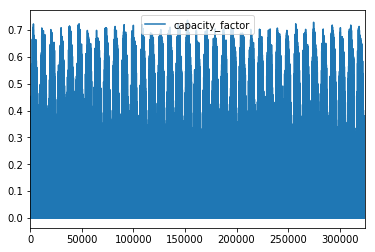

In [8]:
# Show timeseries of data
solar.plot()

Split data into days and visualise this data

In [9]:
# Subset data into 2 years for ease of processing
solar.datetime = pd.to_datetime(solar.datetime)
solar_subset = solar[solar.datetime > "2010"]
solar_subset.head()

,datetime,capacity_factor
262993,2010-01-01 01:00:00,0.0
262994,2010-01-01 02:00:00,0.0
262995,2010-01-01 03:00:00,0.0
262996,2010-01-01 04:00:00,0.0
262997,2010-01-01 05:00:00,0.0


In [10]:
# Have each day on its own row
solar_subset['date'] = solar_subset['datetime'].dt.date
solar_subset['hour'] = solar_subset['datetime'].dt.hour
solar_subset.head()

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,datetime,capacity_factor,date,hour
262993,2010-01-01 01:00:00,0.0,2010-01-01,1
262994,2010-01-01 02:00:00,0.0,2010-01-01,2
262995,2010-01-01 03:00:00,0.0,2010-01-01,3
262996,2010-01-01 04:00:00,0.0,2010-01-01,4
262997,2010-01-01 05:00:00,0.0,2010-01-01,5


In [11]:
each_day = solar_subset.pivot(index='date', columns='hour', values='capacity_factor')
each_day = each_day.dropna()
each_day.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2010-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0056,0.0660,...,0.0832,0.0173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0104,0.1000,...,0.1243,0.0257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0104,0.0962,...,0.1301,0.0300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0044,0.0385,...,0.0539,0.0094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010,0.0322,...,0.0610,0.0119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


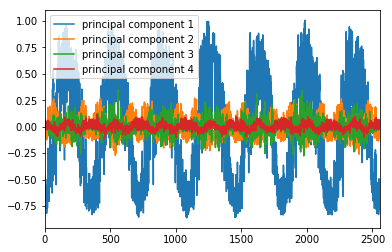

In [14]:
# Visualise as PCA
pca = PCA(n_components=4)

pca_results = pca.fit_transform(each_day)

principal_df = pd.DataFrame(data = pca_results, columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])
principal_df.plot()

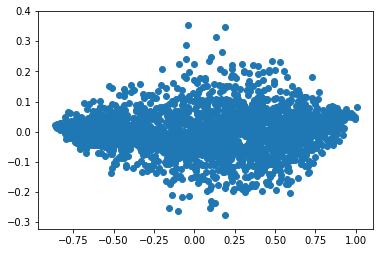

In [16]:
plt.scatter(principal_df['principal component 1'],principal_df['principal component 3'])

# t-SNE


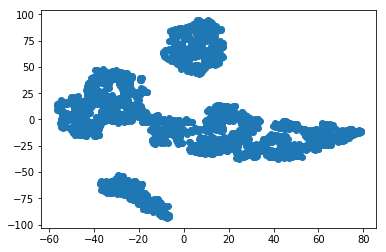

In [26]:
tsne = TSNE(n_components=2, random_state=0, n_iter=2000, early_exaggeration=4)
each_day_2d = tsne.fit_transform(each_day)

plt.scatter(each_day_2d[:,0], each_day_2d[:,1])
plt.show()